In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

In [42]:
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [5]:
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [6]:
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [7]:
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [8]:
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [9]:
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [10]:
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [11]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [12]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [13]:
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [14]:
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

In [15]:
df_top5 = pd.DataFrame(
    df[
        (df["is_valid"] == 1) &
        (df["category"] == "Mobiles & Tablets") &
        (df["order_date"].dt.year == 2022)
    ]
    .groupby("sku_name")["qty_ordered"].sum()
    .sort_values(ascending=False)
    .head(5)
)

In [16]:
df_top5

,qty_ordered
sku_name,
IDROID_BALRX7-Gold,1000
IDROID_BALRX7-Jet black,31
Infinix Hot 4-Gold,15
samsung_Grand Prime Plus-Black,11
infinix_Zero 4-Grey,10


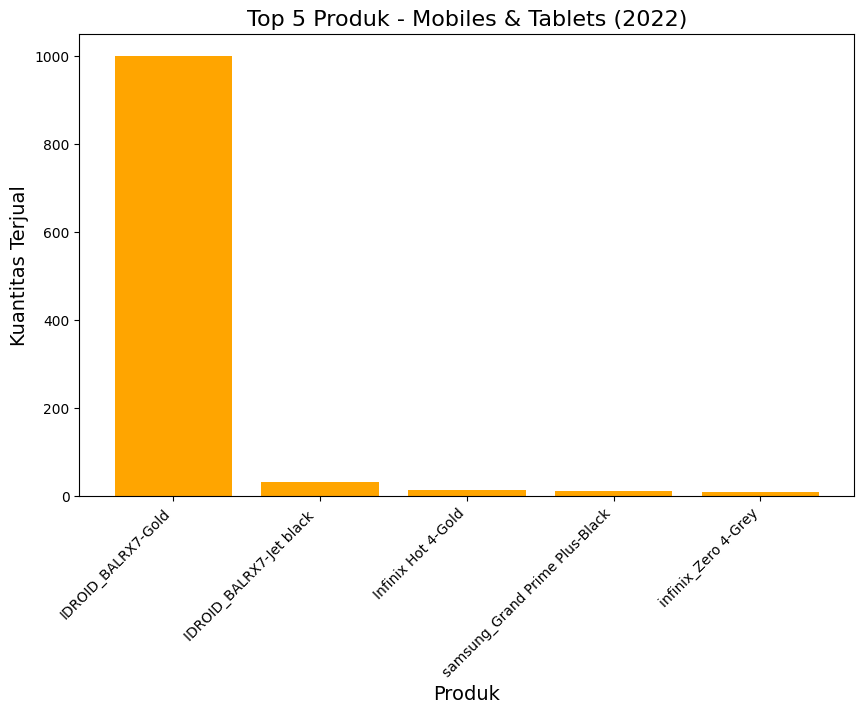

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df_top5.index, df_top5['qty_ordered'], color='orange')

plt.title('Top 5 Produk - Mobiles & Tablets (2022)', fontsize=16)
plt.xlabel('Produk', fontsize=14)
plt.ylabel('Kuantitas Terjual', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

In [18]:
dk2021 = pd.DataFrame(
    df[
        (df["is_valid"] == 1) &
        (df["order_date"].dt.year == 2021)
    ]
    .groupby("category")["qty_ordered"].sum()
    .sort_values(ascending=False)
    .reset_index(name="qty_2021")
)

In [19]:
dk2021

,category,qty_2021
0,Soghaat,759
1,Others,426
2,Superstore,327
3,Men Fashion,237
4,Home & Living,193
5,School & Education,184
6,Health & Sports,173
7,Books,171
8,Kids & Baby,170
9,Beauty & Grooming,168


In [20]:
dk2022 = pd.DataFrame(
    df[
        (df["is_valid"] == 1) &
        (df["order_date"].dt.year == 2022)
    ]
    .groupby("category")["qty_ordered"].sum()
    .sort_values(ascending=False)
    .reset_index(name="qty_2022")
)

In [21]:
dk2022

,category,qty_2022
0,Mobiles & Tablets,1154
1,Soghaat,612
2,Superstore,536
3,Women Fashion,489
4,Others,263
5,Home & Living,250
6,School & Education,237
7,Kids & Baby,227
8,Health & Sports,200
9,Books,195


In [22]:
dk_hasil = pd.merge(dk2021, dk2022, on='category')

In [23]:
dk_hasil

,category,qty_2021,qty_2022
0,Soghaat,759,612
1,Others,426,263
2,Superstore,327,536
3,Men Fashion,237,175
4,Home & Living,193,250
5,School & Education,184,237
6,Health & Sports,173,200
7,Books,171,195
8,Kids & Baby,170,227
9,Beauty & Grooming,168,153


In [24]:
dk_hasil["Growth"] = dk_hasil["qty_2022"] - dk_hasil["qty_2021"]

In [25]:
dk_hasil = dk_hasil.sort_values(by="Growth", ascending = True).reset_index(drop=True)
dk_hasil.index +=1

In [26]:
dk_hasil

,category,qty_2021,qty_2022,Growth
1,Others,426,263,-163
2,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
4,Beauty & Grooming,168,153,-15
5,Books,171,195,24
6,Appliances,124,148,24
7,Health & Sports,173,200,27
8,Computing,109,153,44
9,School & Education,184,237,53
10,Home & Living,193,250,57


<ipython-input-27-dec4a472d1fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Growth', y='category', data=dk_hasil, palette='coolwarm')


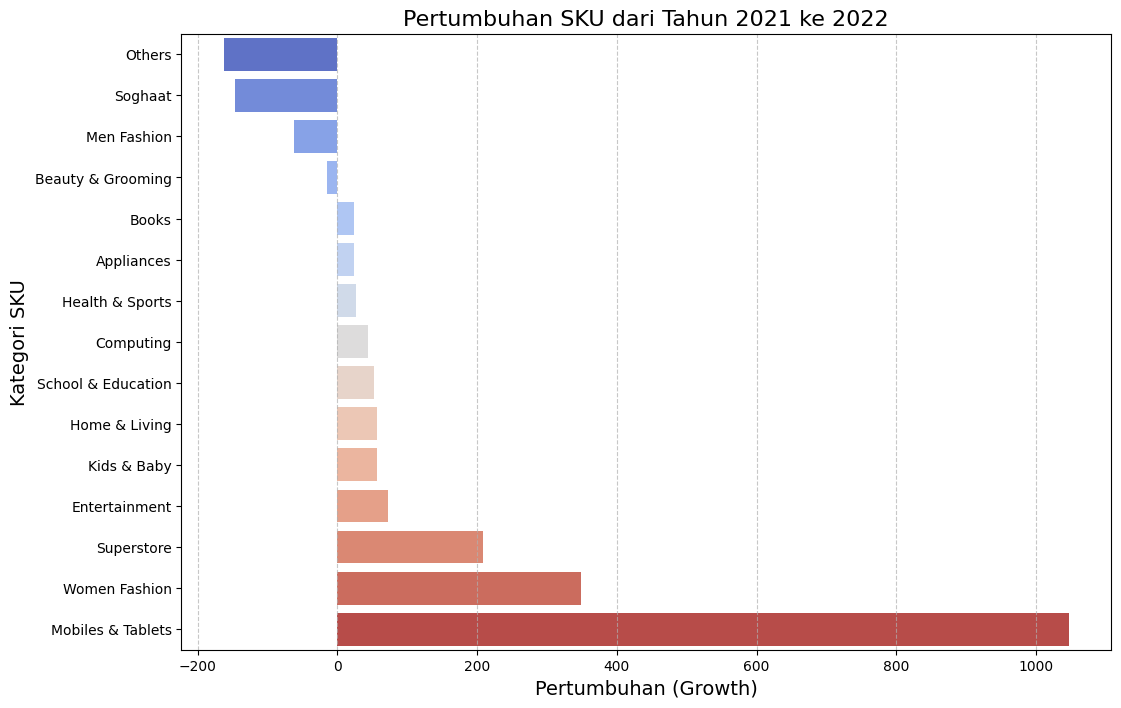

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Growth', y='category', data=dk_hasil, palette='coolwarm')

plt.title('Pertumbuhan SKU dari Tahun 2021 ke 2022', fontsize=16)
plt.xlabel('Pertumbuhan (Growth)', fontsize=14)
plt.ylabel('Kategori SKU', fontsize=14)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

In [28]:
db_2021 = pd.DataFrame(
    df[
        (df["is_valid"] == 1) &
        (df["order_date"].dt.year == 2021)
    ]
    .groupby("sku_name")["qty_ordered"].sum()
    .sort_values(ascending=False)
    .reset_index(name = "qty_2021")
)

In [29]:
db_2022 = pd.DataFrame(
    df[
        (df["is_valid"] == 1) &
        (df["order_date"].dt.year == 2022)
    ]
    .groupby("sku_name")["qty_ordered"].sum()
    .sort_values(ascending=False)
    .reset_index(name = "qty_2022")
)

In [30]:
db_merge = pd.merge(db_2021, db_2022, on='sku_name')
db_merge

,sku_name,qty_2021,qty_2022
0,RB_Dettol Germ Busting Kit-bf,200,45
1,RS_Baklawa 500gm,107,18
2,jn_900g,54,10
3,RS_Soan Papri-250gm,51,7
4,Topline_Waheed Murad His Life and Our Times,41,10
...,...,...,...
164,PNG_Pampers_10003451-Hazir,1,5
165,PNG_Pampers_10003452-Hazir,1,22
166,PS4_Slim-500GB,1,1
167,Paramount_9781107636828,1,1


In [31]:
db_merge["Growth"] = db_merge["qty_2022"] - db_merge["qty_2021"]
db_merge = db_merge.sort_values(by = "Growth" , ascending = True).reset_index(drop=True).head(20)
db_merge.index += 1

In [32]:
db_merge

,sku_name,qty_2021,qty_2022,Growth
1,RB_Dettol Germ Busting Kit-bf,200,45,-155
2,RS_Baklawa 500gm,107,18,-89
3,jn_900g,54,10,-44
4,RS_Soan Papri-250gm,51,7,-44
5,Topline_Waheed Murad His Life and Our Times,41,10,-31
6,RS_Kaju Barfi,34,13,-21
7,Telemall_MM-DR-HB-L,23,2,-21
8,BB_bundle_bf,17,1,-16
9,Al Muhafiz Sohan Halwa Cashew,20,6,-14
10,RS_Double Delight,14,2,-12


<ipython-input-33-8e6218dae6be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Growth", y="sku_name", data=db_merge, palette="mako")


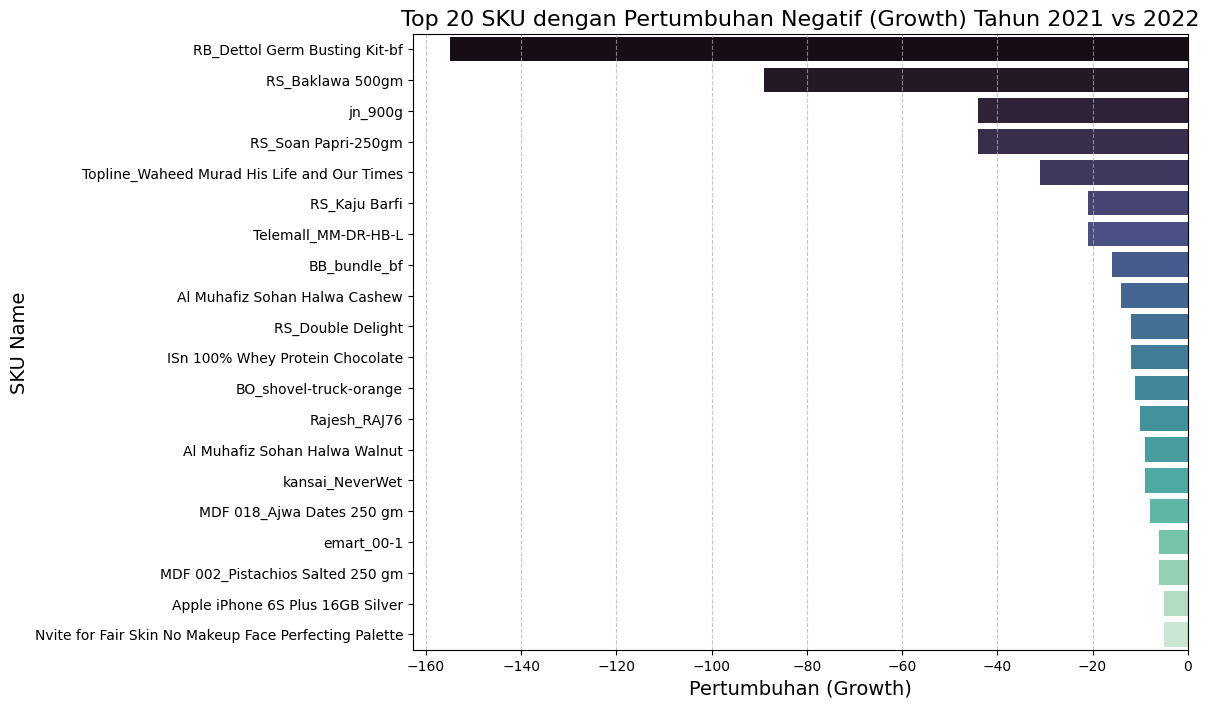

In [33]:
plt.figure(figsize=(10, 8))

sns.barplot(x="Growth", y="sku_name", data=db_merge, palette="mako")

plt.title("Top 20 SKU dengan Pertumbuhan Negatif (Growth) Tahun 2021 vs 2022", fontsize=16)
plt.xlabel("Pertumbuhan (Growth)", fontsize=14)
plt.ylabel("SKU Name", fontsize=14)


plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

In [34]:
df4 = df[(df['is_gross']== 1) &
         (df['is_valid']== 0) &
         (df['is_net'] == 0 ) &
         (df['order_date'].dt.year == 2022)
         ]
df4

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
9,ODR9699658949w,C246762L,2022-05-21,P168052,6487648,1,6487648,638000,5849648,1,0,0,7,Easypay,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2022-05-08
18,ODR1965502162e,C848774L,2022-05-20,P168052,6487648,1,6487648,364812,6122835,1,0,0,2,jazzvoucher,iPhone7Plus-Red-256GB,6487648,5125228,Mobiles & Tablets,2021-11-07
19,ODR8450052777q,C693415L,2022-04-15,P132718,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Gray,5626000,4219500,Mobiles & Tablets,2022-04-12
21,ODR7673587024b,C180595L,2022-04-17,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-22
22,ODR7333927150n,C587425L,2022-12-04,P619324,5626000,1,5626000,348000,5278000,1,0,0,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,ODR2291109358n,C394076L,2022-02-22,P800680,58,2,116,0,116,1,0,0,4,Payaxis,test-product-00,290,174,Others,2021-10-12
5859,ODR4338250762i,C248585L,2022-01-08,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-10
5865,ODR4656313388n,C471304L,2022-05-16,P194155,0,1,0,0,0,1,0,0,6,easypay_voucher,Bahr-e-Shifa,0,0,Books,2022-05-13
5881,ODR7628482404c,C265450L,2022-10-07,P194155,0,3,0,0,0,1,0,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-02-17


In [35]:
df5 = df4[['customer_id' , 'registered_date']]
df5

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13
5881,C265450L,2022-02-17


In [36]:
from google.colab import files
df5.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False)
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

In [37]:

df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_num'] = df['order_date'].dt.month

weekends = (
    df[
        (df['is_valid'] == 1) &
        (df['day'].isin(['Saturday', 'Sunday'])) &
        (df['order_date'] >= '2022-10-01') &
        (df['order_date'] <= '2022-12-31')
    ]
    .groupby(by=["month_num", "month"])['before_discount'].mean()
    .round()
    .sort_values(ascending=False)
    .reset_index(name='avg_sales_weekend')
)

weekdays = (
    df[
        (df['is_valid'] == 1) &
        (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
        (df['order_date'] >= '2022-10-01') &
        (df['order_date'] <= '2022-12-31')
    ]
    .groupby(by=["month_num", "month"])['before_discount'].mean()
    .round()
    .sort_values(ascending=False)
    .reset_index(name='avg_sales_weekdays')
)

In [38]:
monthly = weekends.merge(weekdays, left_on='month', right_on='month')
monthly.sort_values(by=['month_num_x'], ascending=True, inplace=True)

monthly = monthly[['month', 'avg_sales_weekend', 'avg_sales_weekdays']]
df_groupby_weekend = monthly

df_groupby_weekend['diff_value'] = df_groupby_weekend['avg_sales_weekend'] - df_groupby_weekend['avg_sales_weekdays']
df_groupby_weekend['diff_percent'] = round((df_groupby_weekend['diff_value'] / df_groupby_weekend['avg_sales_weekend']) * 100)

df_groupby_weekend

,month,avg_sales_weekend,avg_sales_weekdays,diff_value,diff_percent
0,October,634260.0,874690.0,-240430.0,-38.0
1,November,607794.0,641862.0,-34068.0,-6.0
2,December,410599.0,813574.0,-402975.0,-98.0


<Axes: xlabel='Bulan', ylabel='Total'>

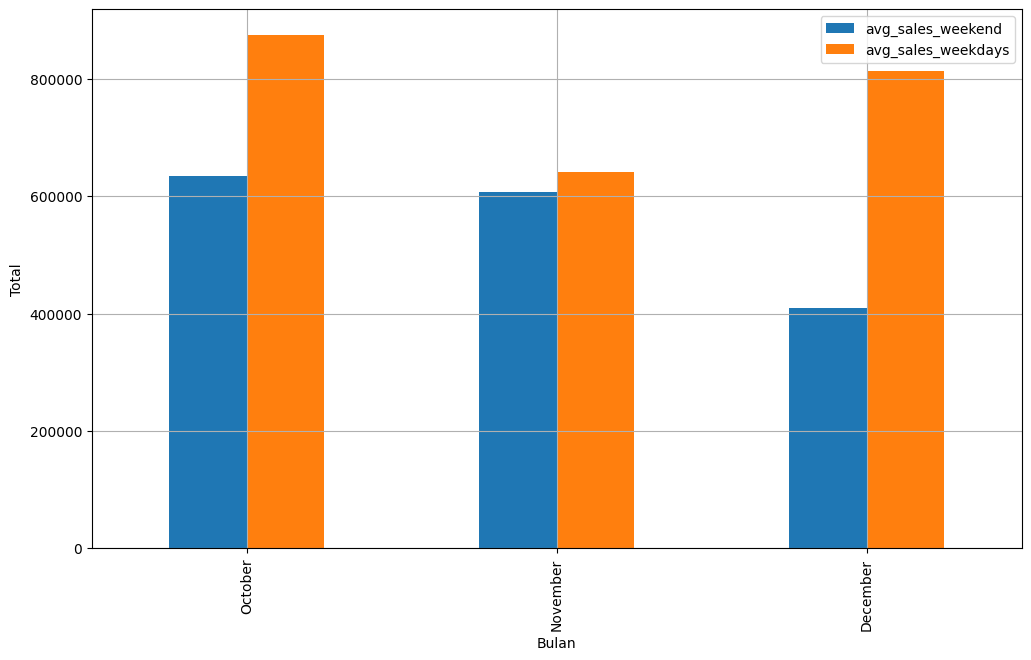

In [39]:
df_groupby_weekend.plot(
    x='month',
    y=['avg_sales_weekend', 'avg_sales_weekdays'],
    kind='bar',
    grid=True,
    xlabel='Bulan',
    ylabel='Total',
    figsize=(12, 7),
    rot=90,
    table=False,
    color=['#1f77b4', '#ff7f0e']
)

In [40]:
sales_weekend = df[
    (df['is_valid'] == 1) &
    (df['day'].isin(['Saturday', 'Sunday'])) &
    (df['order_date'] >= '2022-10-01') &
    (df['order_date'] <= '2022-12-31')
]

sales_weekday = df[
    (df['is_valid'] == 1) &
    (df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
    (df['order_date'] >= '2022-10-01') &
    (df['order_date'] <= '2022-12-31')
]

In [41]:
sales_summary = pd.DataFrame({
    'Periode': ['Oktober - Desember 2022'],
    'Rata-rata Penjualan Akhir Pekan': [round(sales_weekend['before_discount'].mean(), 2)],
    'Rata-rata Penjualan Hari Kerja': [round(sales_weekday['before_discount'].mean(), 2)],
    'Selisih Nilai (Rupiah)': [round(sales_weekend['before_discount'].mean() - sales_weekday['before_discount'].mean(), 2)],
    'Selisih Persentase (%)': [round(((sales_weekend['before_discount'].mean() - sales_weekday['before_discount'].mean()) / sales_weekend['before_discount'].mean()) * 100, 2)]
})

sales_summary

,Periode,Rata-rata Penjualan Akhir Pekan,Rata-rata Penjualan Hari Kerja,Selisih Nilai (Rupiah),Selisih Persentase (%)
0,Oktober - Desember 2022,558865.15,770146.01,-211280.86,-37.81
